
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [ ]:
# Set your student number and name
student_number = "401105815"
Name = "Radin"
Last_Name = "Cheraghi"

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [1]:
import numpy as np

def generate_synthetic_dataset():
  np.random.seed(42)
  X = np.random.uniform(-3,-1,1000)
  Y = 0.1 * X**6 - 2 * X**3 + 7 * X**2 - 9 * X + 3
  Y = Y + np.random.normal(0,5, len(X))
  return X,Y

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [2]:
from sklearn.model_selection import train_test_split

#TODO
x, y = generate_synthetic_dataset()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 42) # This test set is in range of training data


x_4_6 = np.random.uniform(4,6,len(x_test))
y_4_6 = 0.1 * x_4_6**6 - 2 * x_4_6**3 + 7 * x_4_6**2 - 9 * x_4_6 + 3
y_4_6 = y_4_6 + np.random.normal(0,5, len(x_4_6))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [10]:
from sklearn.preprocessing import normalize
class PolynomialRegression() :

    def __init__( self, degree, learning_rate = 0.05, iterations =500) :
        # initialize  model
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None

    def fit( self, X, Y ) :
      # input : X and Y for fit model with gradient descent and return Self
        # x = np.ones((X.shape[0], 1))
        # for i in range(1, self.degree + 1):
        #   x = np.hstack((x, X.reshape(-1, 1)**i))
        mean = np.mean(X)
        std = np.std(X)
        self.mean = mean
        self.std = std
        x = np.vander((X - mean) / std, self.degree + 1, increasing=True)
        self.weights = np.zeros(x.shape[1])
        for i in range(self.iterations):
          distance = x.dot(self.weights) - Y
          gradient = 2 * x.T.dot(distance) / len(Y)
          gradient = np.clip(gradient, -1, 1)
          self.weights -= self.learning_rate * gradient
        return self

    # predict

    def predict( self, X ) :
        # Get X and return predicted value from model
        # x = np.ones((X.shape[0], 1))
        # for i in range(1, self.degree + 1):
        #   x = np.hstack((x, X.reshape(-1, 1)**i))
        x = np.vander((X - self.mean) / self.std, self.degree + 1, increasing=True)
        return x.dot(self.weights)
models = []
for degree in range(2, 13):
    model = PolynomialRegression(degree, learning_rate = 0.001, iterations = 100000)
    model.fit(x_train, y_train)
    models.append(model)

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [4]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_train, y_train , X_test, y_test): # adding X_train, y_train to inputs of funct
    test_eval = []
    train_eval = []
    for model in models:
      y_train_p = model.predict(X_train)
      y_test_p = model.predict(X_test)
      train_eval.append(mean_squared_error(y_train, y_train_p))
      test_eval.append(mean_squared_error(y_test, y_test_p))
    return train_eval, test_eval

# models = []
# for degree in range(2, 13):
#     model = PolynomialRegression(degree=degree)
#     model.fit(x_train, y_train)
#     models.append(model)

train_in_range, test_in_range = evaluate_models(models, x_train, y_train, x_test, y_test)
_, test_4_6 = evaluate_models(models, x_train, y_train, x_4_6, y_4_6)


for degree in range(2, 13):
    print(f"Degree: {degree}")
    print(f"Train MSE (in range): {train_in_range[degree-2]}")
    print(f"Test MSE (in range): {test_in_range[degree-2]}")
    print(f"Test MSE (4 to 6 range): {test_4_6[degree-2]}")
    print("\n")

Degree: 2
Train MSE (in range): 34.571454303223334
Test MSE (in range): 33.21248377756889
Test MSE (4 to 6 range): 668263.4273734621


Degree: 3
Train MSE (in range): 26.246561742653068
Test MSE (in range): 22.718538277099498
Test MSE (4 to 6 range): 50056937.49293937


Degree: 4
Train MSE (in range): 25.433578373246988
Test MSE (in range): 22.53833962743919
Test MSE (4 to 6 range): 253040075.70573112


Degree: 5
Train MSE (in range): 25.555412329539863
Test MSE (in range): 22.505625239726324
Test MSE (4 to 6 range): 34571468267.62651


Degree: 6
Train MSE (in range): 26.629441580008212
Test MSE (in range): 23.263067667987006
Test MSE (4 to 6 range): 43686307733306.26


Degree: 7
Train MSE (in range): 26.567485074324633
Test MSE (in range): 23.84872292659881
Test MSE (4 to 6 range): 3776780985230238.0


Degree: 8
Train MSE (in range): 26.057147356345013
Test MSE (in range): 23.367128271940892
Test MSE (4 to 6 range): 2.8321182389744116e+16


Degree: 9
Train MSE (in range): 26.243154811

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

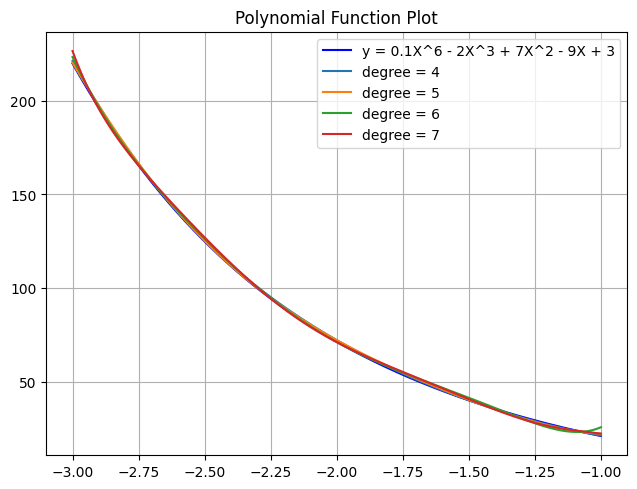

In [5]:
# TODO
import matplotlib.pyplot as plt

x_plt = np.linspace(-3,-1,1000) # it should be changed later
y_plt = 0.1 * x_plt**6 - 2 * x_plt**3 + 7 * x_plt**2 - 9 * x_plt + 3
plt.figure(figsize=(7.5, 5.5))
plt.plot(x_plt, y_plt, label="y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3", color='blue')
for degree in [4,5,6,7]:
  model = models[degree - 2]
  y_p = model.predict(x_plt)
  plt.plot(x_plt, y_p, label=f"degree = {degree}")


plt.title("Polynomial Function Plot")

plt.grid(True)
plt.legend()
plt.show()



## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

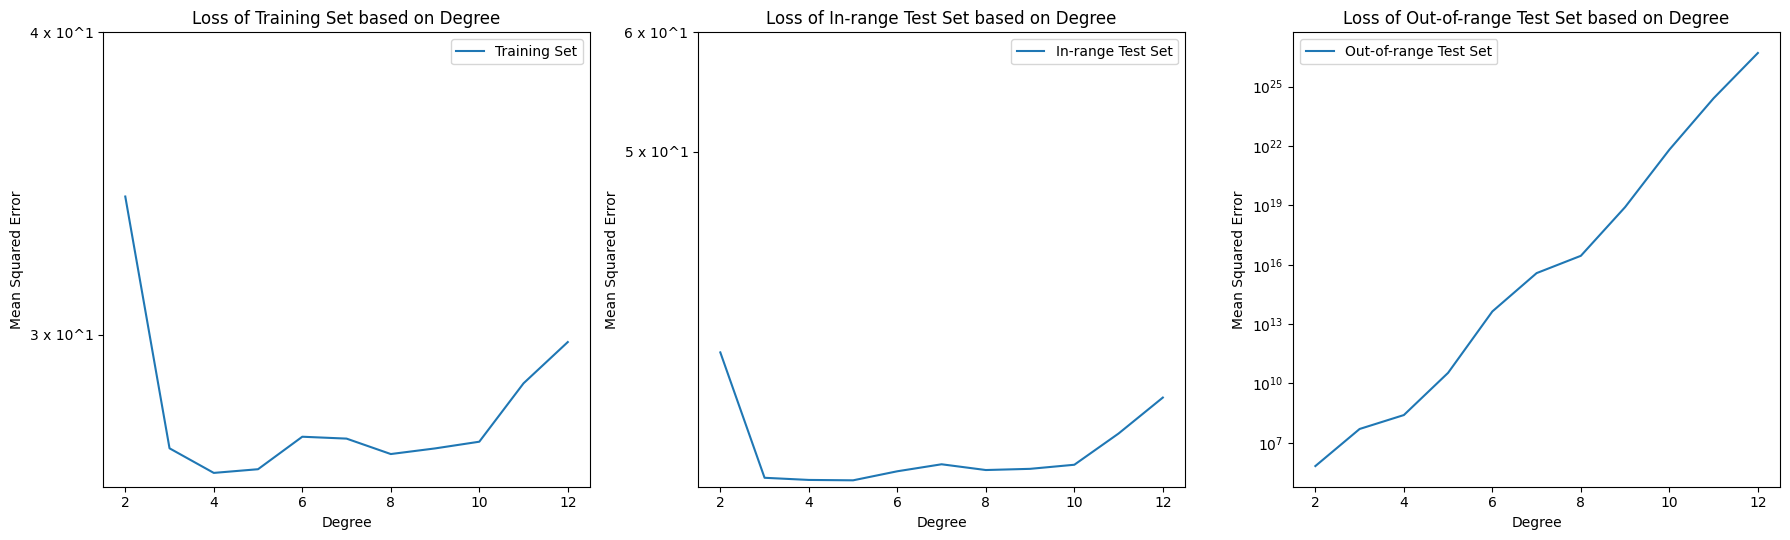

In [7]:
#TODO
fig, axes = plt.subplots(1, 3, figsize=(18, 5.5), sharey=False)

axes[0].plot(range(2, 13), train_in_range, label='Training Set')
axes[0].set_title('Loss of Training Set based on Degree')
axes[0].set_yticks([3 * 10, 4 * 10])
axes[0].set_yticklabels(['3 x 10^1', '4 x 10^1'])

axes[1].plot(range(2, 13), test_in_range, label='In-range Test Set')
axes[1].set_title('Loss of In-range Test Set based on Degree')
axes[1].set_yticks([5 * 10, 6 * 10])
axes[1].set_yticklabels(['5 x 10^1', '6 x 10^1'])

axes[2].plot(range(2, 13), test_4_6, label='Out-of-range Test Set')
axes[2].set_title('Loss of Out-of-range Test Set based on Degree')
axes[2].set_yticks([4.12e6, 4.14e6, 4.16e6, 4.18e6, 4.19e6])
axes[2].set_yticklabels(['4.12 x 10^6', '4.14 x 10^6', '4.16 x 10^6', '4.18 x 10^6', '4.19 x 10^6'])

for i in range(3):
  axes[i].set_xlabel('Degree')
  axes[i].set_ylabel('Mean Squared Error')
  axes[i].legend()

plt.yscale('log')
plt.tight_layout()
plt.show()


## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

Graph of Out-of-range Test Set shows that loss function error will increase significantly in higher degrees but result is opposite in graph of Training Set. what is main reason of this happening? overfitting. when we consider polynomials with higher degrees bias will be low and variance will be high(if we change our training set we see that graph will change significantly) and overfitting happens so test losses. But when we consider polynomials with lower degrees we decline complex models and bias will be high and therfore variance will be low. In this case loss function error for both test set and training set is high and this is because underfitting. From this results we conclude that a trade off exists between variance and bias so finding best degree for our model is the crucial point in solving our problem.